# Convolutional Neural Networks (CNNs) - Coloured Image Data

> Tags: [Data Science], [Machine Learning]
>
> Technical Skills: [Python], [Numpy], [Pandas], [Tensorflow 2], [Keras], [API]
>
> Theoretical Frameworks: [Neural Networks], [Convolutions], [Pooling Layers]

> [!NOTE]
>
> This exercise comes directly from Jose Portilla and his team's fantastic course in Udemy of [Complete Tensorflow 2 and Keras Deep Learning Bootcamp](https://www.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp/).
>
> This was part of the [Workearly](https://www.workearly.gr) bootcamp.

Loading the CIFAR-10 Dataset through Keras API, which consists 32 by 32 coloured images of 10 different objects, and then creating a Machine Learning (CNN) model using Tensorflow 2 that attempts to predict a given image.

## 1. Importing the dataset & model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

### Checking the properties of the dataset and the image data

In [6]:
x_train.shape

(50000, 32, 32, 3)

This tells us that there are 50000 pictures, 32x32 pixels, with 3 colour channels (RGB).

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

[0] is a picture indexed 0, which we can see when we ".shape" by having 32x32 pixels and 3 colour channels. If interested about the consistency of the pixels of the image data, it can be observed on its raw form under the result of "x_train[0]." The arrays are combinations of values of colours that make up what we say 32 by 32.

To be more practical, let's show that picture indexed [0] below.

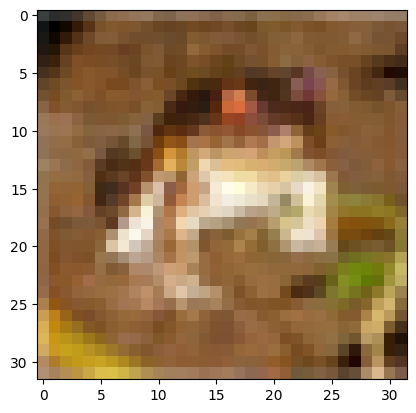

In [10]:
plt.imshow(x_train[0])

It's a blurred frog! :)

This can be done with any given number between [0-49999]. 

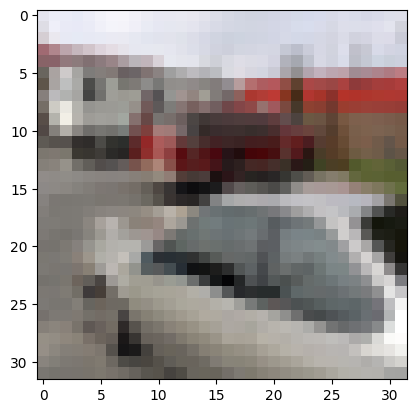

In [12]:
plt.imshow(x_train[49999])

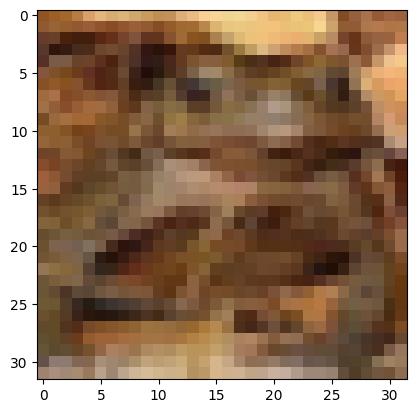

In [13]:
plt.imshow(x_train[3567])

And so on!

## Data Preprocessing

In [15]:
x_train[0].max()

255

This tells us that indeed, the maximum value that a picture can take for any given variable/value within an array is 255, and therefore has the range of [0-255].

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

The array labels work as continuous values in the network, and if left as such then the CNN would try to predict in a numerical way, which would not be very helpful as it would name a predicted image as '[6]' instead of 'Frog' or 'Car'.

So we need to tackle this as a multi-class classification problem, and one-hot encode it. Technically, converting the labels of the array into categorical data.

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train,10)

In [22]:
y_cat_test = to_categorical(y_test,10)

Making sure that 10 classes are specified within the mapping of the categorical encoding.

To clarify the logic above, within the CIFAR-10 dataset, we know for a fact (by simply [googling](https://www.google.com/search?q=cifar10+label+number+6&client=opera&hs=6y0&sca_esv=acb05f42373aaad6&sca_upv=1&ei=M9fNZvmqDcCrxc8Pz4qTyQw&ved=0ahUKEwi5kMWHppWIAxXAVfEDHU_FJMkQ4dUDCA8&uact=5&oq=cifar10+label+number+6&gs_lp=Egxnd3Mtd2l6LXNlcnAiFmNpZmFyMTAgbGFiZWwgbnVtYmVyIDYyBRAhGKABMgUQIRigAUiEIFC6BFj3HnAGeAGQAQCYAWmgAc8IqgEEMTQuMbgBA8gBAPgBAZgCFaAC9gjCAgoQABiwAxjWBBhHwgIGEAAYFhgewgILEAAYgAQYhgMYigXCAggQABiABBiiBMICCxAAGIAEGJECGIoFwgIFEAAYgATCAgcQIRigARgKmAMAiAYBkAYIkgcEMjAuMaAHsCg&sclient=gws-wiz-serp) it) that frog's label is mapped to 6, and that can be seen when we evaluate the array for image indexed [0]

In [23]:
y_train[0]

array([6], dtype=uint8)

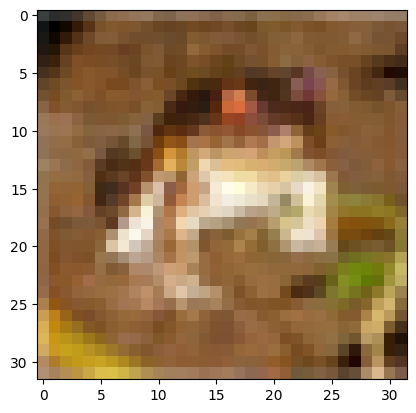

In [24]:
plt.imshow(x_train[0])

## Building the ML (CNN) model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

# Convolutional Layer (1)
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))

# Pooling Layer (1)
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional Layer (2)
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu',))

# Pooling Layer (2)
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

B:\Anaconda\envs\mytfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The raison d'etre of the two convolutional layers and the two pooling layers, is due to the complexity of the images. The Data load that the model is called to process, is 32*32*3 = 3072.

'relu' refers to *rectified linear unit*, an activation function that helps incorporate nonlinearity in neural networks, and additionally helps tackle the vanishing gradient problem.

'softmax' because we are dealing with a multiclass problem

Also, we will ignore the UserWarning I was just given, because I embrace chaos.

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

### Creating an early stop

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Fitting the train data

In [32]:
model.fit(x_train,y_cat_train,epochs=15,
         validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3761 - loss: 1.7052 - val_accuracy: 0.5249 - val_loss: 1.3182
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5628 - loss: 1.2429 - val_accuracy: 0.5923 - val_loss: 1.1439
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6254 - loss: 1.0659 - val_accuracy: 0.6133 - val_loss: 1.0917
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6695 - loss: 0.9525 - val_accuracy: 0.6474 - val_loss: 1.0103
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6951 - loss: 0.8712 - val_accuracy: 0.6529 - val_loss: 1.0017
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7263 - loss: 0.7795 - val_accuracy: 0.6616 - val_loss: 0.9860
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7580 - loss: 0.6857 - val_accuracy: 0.6680 - val_loss: 0.9821
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7782 - loss: 0.6

Default accuracy should be 10% based on the dataset, but as epochs go by, we observe the model becomes better and better at accurately predicting.

The early_stop has finished on 9 epochs, and has returned an accuracy of 80.31% as of the 9th epoch.

## Evaluating the model

In [33]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

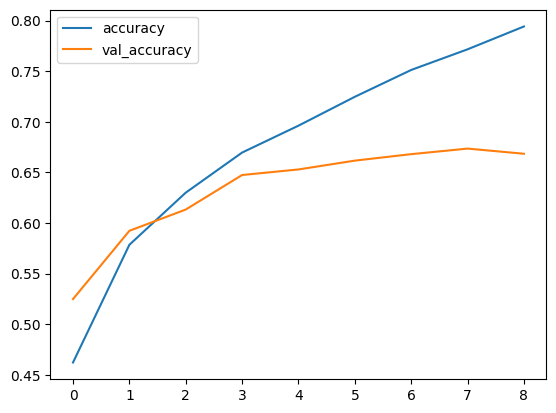

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

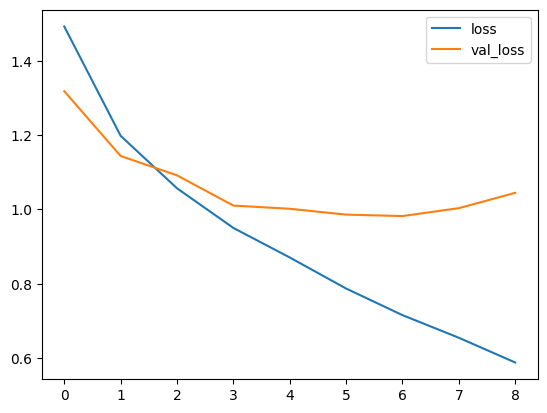

In [37]:
metrics[['loss', 'val_loss']].plot()

It seems validation loss has started going up since the 6th epoch, so the early stop was correct to stop on the 8th epoch. The trade off for the added accuracy, was desirable.

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0445741415023804, 0.66839998960495]

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predicted_classes = np.argmax(predictions, axis=1)

In [45]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.77      0.80      0.78      1000
           2       0.59      0.56      0.57      1000
           3       0.46      0.49      0.47      1000
           4       0.67      0.56      0.61      1000
           5       0.53      0.57      0.55      1000
           6       0.75      0.74      0.74      1000
           7       0.74      0.69      0.72      1000
           8       0.77      0.79      0.78      1000
           9       0.69      0.79      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



The f1-score for accuracy is 67%. Since this data set has 10 classes, then as mentioned earlier, the default prediction should be at 10%, meaning that if you took a random guess, you would have 10% chance to be correct about the category of the image. Therefore, 67% is a good overall performance in accuracy.

Interestingly so, the model we just created, tends to not perform well for the label: 3, which as seen in [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) it's cats. Funnily enough, we observe the same with label: 5 which is dogs, with f1-scores being very closely aligned (0.47 for label: 3 and 0.55 for label: 5). This could be explained by how limited the quality of the pixels is on 32x32 on depicting a dog or a cat and the computer being able to tell the difference.

Let's test some predictions.

In [53]:
confusion_matrix(y_test,predicted_classes)

array([[704,  31,  63,  19,  21,   7,  12,   9,  77,  57],
       [ 28, 795,  11,   7,   2,   4,  11,   3,  31, 108],
       [ 63,  12, 560,  88,  59,  85,  62,  30,  22,  19],
       [ 17,  19,  71, 487,  48, 217,  53,  41,  20,  27],
       [ 18,   6,  92,  88, 558,  62,  67,  74,  22,  13],
       [ 18,   8,  55, 196,  37, 566,  29,  58,  16,  17],
       [  6,  14,  47,  87,  27,  33, 742,  10,  17,  17],
       [ 21,  13,  29,  53,  64,  74,   8, 694,   5,  39],
       [ 63,  44,  15,  13,   6,   8,   3,   7, 791,  50],
       [ 26,  92,   9,  20,   6,  14,   8,   9,  29, 787]], dtype=int64)

<Axes: >

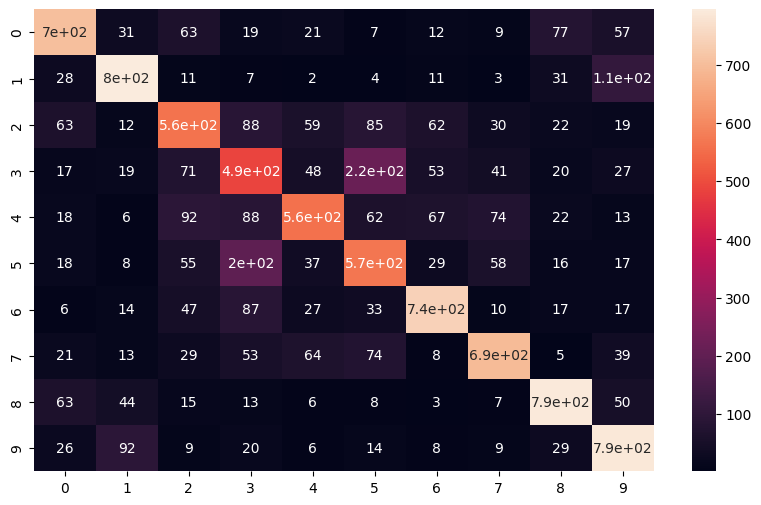

In [52]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

Based on the colouring here, we see indeed that pairs (3,5) and (5,3) which is (cats,dogs) and (dogs,cats) are indeed troublesome as they are more closely correlated by the computer.

To clarify. the lighter the colour of a block (towards 700), it means that the machine predicts that label to be the matching label. For example, all predictions made for pictures labeled 4, the machine likely classified it as 4 indeed, and that's why we see a strong light colour in (4,4) but in any other combination with 4, it is dark (below 100), as it finds no correlation to the other pair.

When we see labels 3 and 5, we see that not only do they get a higher hue in their respective classes (3,3), (5,5) but also that they are a scoring a bit more than 200 in combinations (3,5) and (5,3) meaning the machine is indeed confusing the two categories when it tries to predict.

In [65]:
pred_image = x_test[0]

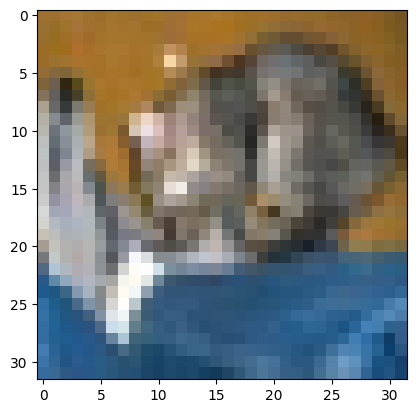

In [56]:
plt.imshow(pred_image)

In [57]:
y_test[0]

array([3], dtype=uint8)

In [67]:
np.argmax(model.predict(pred_image.reshape(1,32,32,3)), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([3], dtype=int64)

And there we go! 

We took a picture in our test model indexed [0] which is a bit *dubious* as we can see under the image show, and we used the prediction model to tell us what it thinks it is, and gave us array[3] which is a cat!